In [53]:
# Dependencies and Setup
# import hvplot.pandas
import pandas as pd
import requests


# Import API key
# from api_keys import geoapify_key
# diplaying rows
pd.set_option('display.max_rows', None)

In [67]:

pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [54]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
raw_crime_data_df = pd.read_csv("../Data/Crime_Data.csv")
# Display sample data
raw_crime_data_df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,3/1/20 0:00,3/1/20 0:00,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,2/9/20 0:00,2/8/20 0:00,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/20 0:00,11/4/20 0:00,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,5/10/23 0:00,3/10/20 0:00,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,8/18/22 0:00,8/17/20 0:00,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [55]:

# loading data fram
raw_crime_data_df.info()
# changed column name
raw_crime_data_df.rename(columns={'Crm Cd Desc': 'Crime type'}, inplace=True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966951 entries, 0 to 966950
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           966951 non-null  int64  
 1   Date Rptd       966951 non-null  object 
 2   DATE OCC        966951 non-null  object 
 3   TIME OCC        966951 non-null  int64  
 4   AREA            966951 non-null  int64  
 5   AREA NAME       966951 non-null  object 
 6   Rpt Dist No     966951 non-null  int64  
 7   Part 1-2        966951 non-null  int64  
 8   Crm Cd          966951 non-null  int64  
 9   Crm Cd Desc     966951 non-null  object 
 10  Mocodes         826575 non-null  object 
 11  Vict Age        966951 non-null  int64  
 12  Vict Sex        833245 non-null  object 
 13  Vict Descent    833235 non-null  object 
 14  Premis Cd       966937 non-null  float64
 15  Premis Desc     966375 non-null  object 
 16  Weapon Used Cd  325476 non-null  float64
 17  Weapon Des

In [76]:

# Assuming 'raw_crime_data_df' is your DataFrame and 'Crime type' is the column
# Calculate the frequency of each category as a proportion
category_proportions = raw_crime_data_df['Crime type'].value_counts(normalize=True)

# Identify the categories that appear less than 1%
categories_to_group = category_proportions[category_proportions < 0.01].index

# Replace these categories with 'other crimes'
raw_crime_data_df['Crime type'] = raw_crime_data_df['Crime type'].apply(lambda x: 'OTHER CRIMES' if x in categories_to_group else x)

# Display the modified DataFrame
print(raw_crime_data_df['Crime type'].value_counts())


Crime type
other crimes                                                133680
VEHICLE - STOLEN                                            107349
BATTERY - SIMPLE ASSAULT                                     74623
BURGLARY FROM VEHICLE                                        60128
THEFT OF IDENTITY                                            59801
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)      58702
BURGLARY                                                     57655
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               53321
THEFT PLAIN - PETTY ($950 & UNDER)                           50097
INTIMATE PARTNER - SIMPLE ASSAULT                            46679
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)              38392
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)          35048
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     32828
ROBBERY                                                      32104
SHOPLIFTING - PETTY THEFT ($950 & UNDER)           

Crime type
other crimes                                                13.824899
VEHICLE - STOLEN                                            11.101804
BATTERY - SIMPLE ASSAULT                                     7.717351
BURGLARY FROM VEHICLE                                        6.218309
THEFT OF IDENTITY                                            6.184491
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)      6.070835
BURGLARY                                                     5.962557
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               5.514344
THEFT PLAIN - PETTY ($950 & UNDER)                           5.180924
INTIMATE PARTNER - SIMPLE ASSAULT                            4.827442
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)              3.970418
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)          3.624589
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     3.395001
ROBBERY                                                      3.320127
SHOPLIFTI

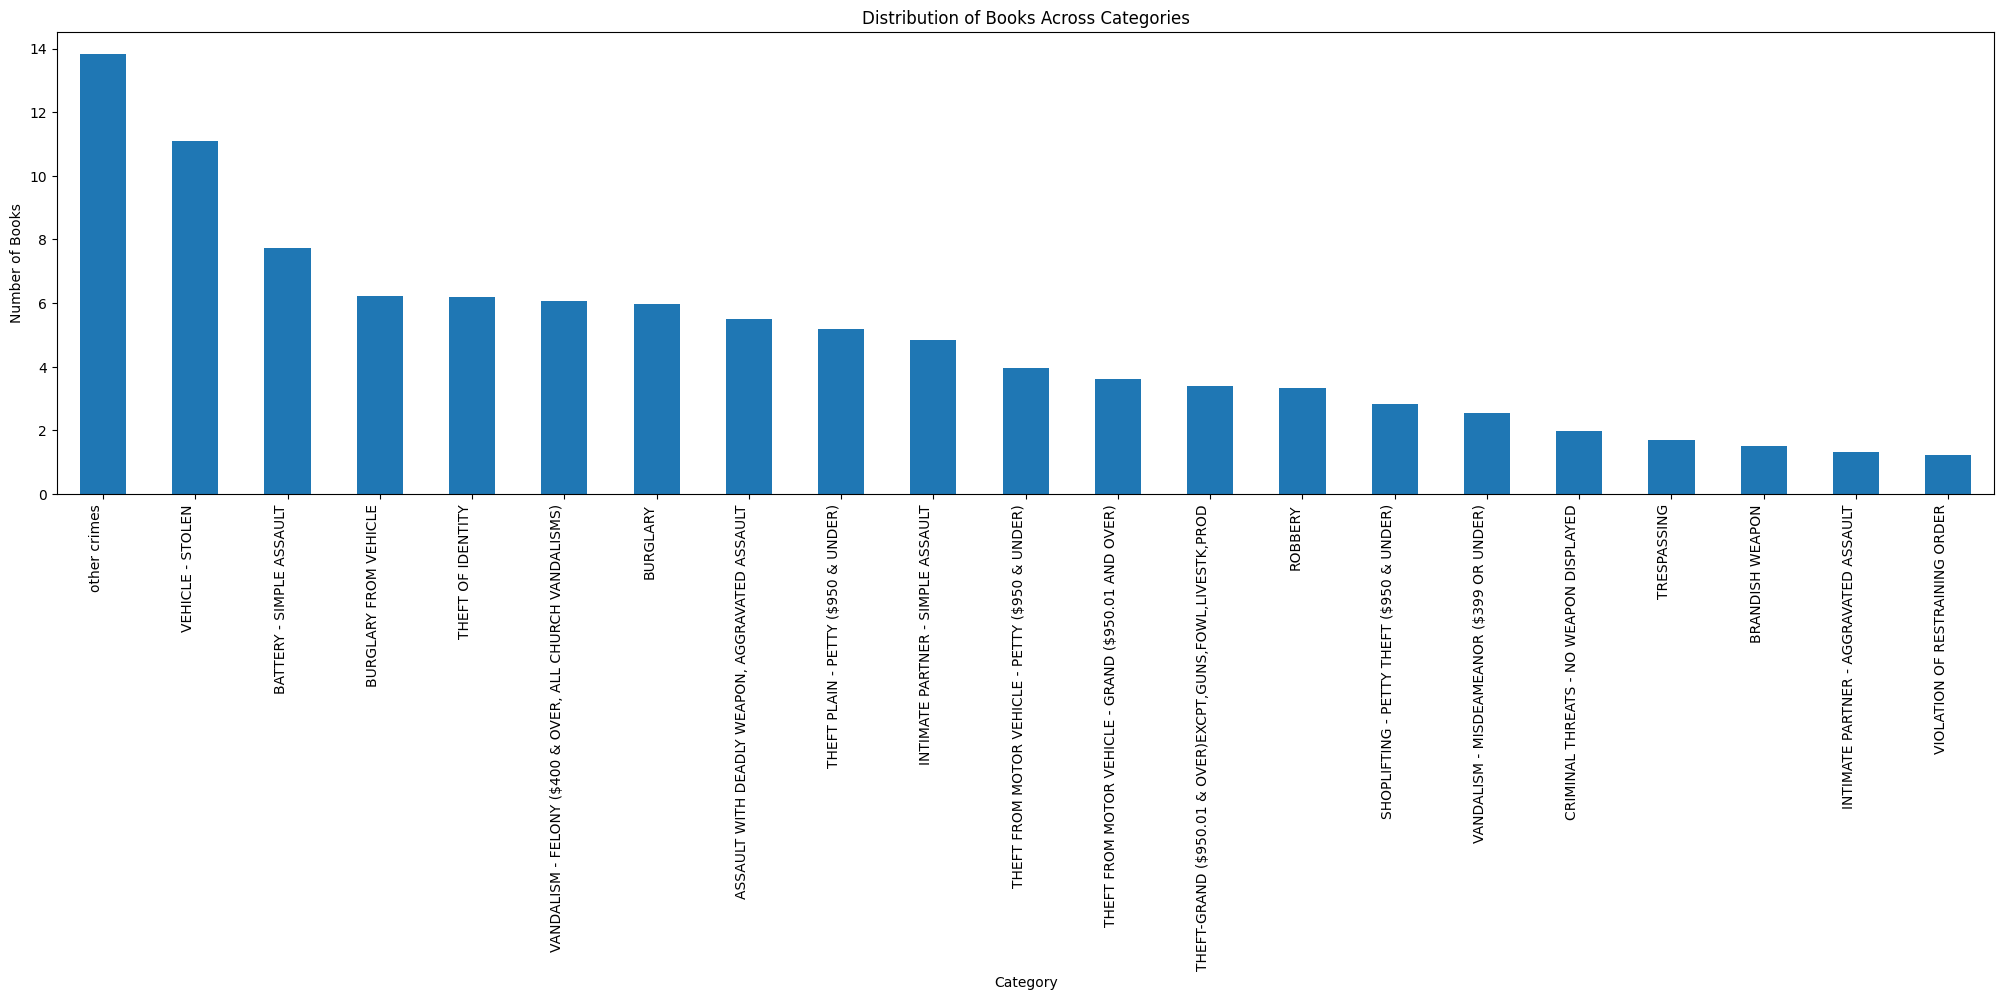

In [77]:
import matplotlib.pyplot as plt

# Plot the distribution

cat_counts = raw_crime_data_df['Crime type'].value_counts(normalize=True)*100
print(cat_counts)

plt.figure(figsize=(25, 6))
cat_counts.plot(kind="bar")
plt.title('Distribution of Books Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.xticks(rotation=90, ha='right')
plt.show()

In [66]:
raw_crime_data_df["AREA NAME"].value_counts()

AREA NAME
Central        66233
77th Street    60222
Pacific        56655
Southwest      54856
Hollywood      50581
N Hollywood    49141
Southeast      48547
Olympic        48293
Newton         47595
Wilshire       46308
Rampart        44946
West LA        44025
Van Nuys       41259
Northeast      41175
West Valley    40820
Devonshire     40113
Harbor         39889
Topanga        39878
Mission        38708
Hollenbeck     35562
Foothill       32145
Name: count, dtype: int64

In [68]:
import seaborn as sns

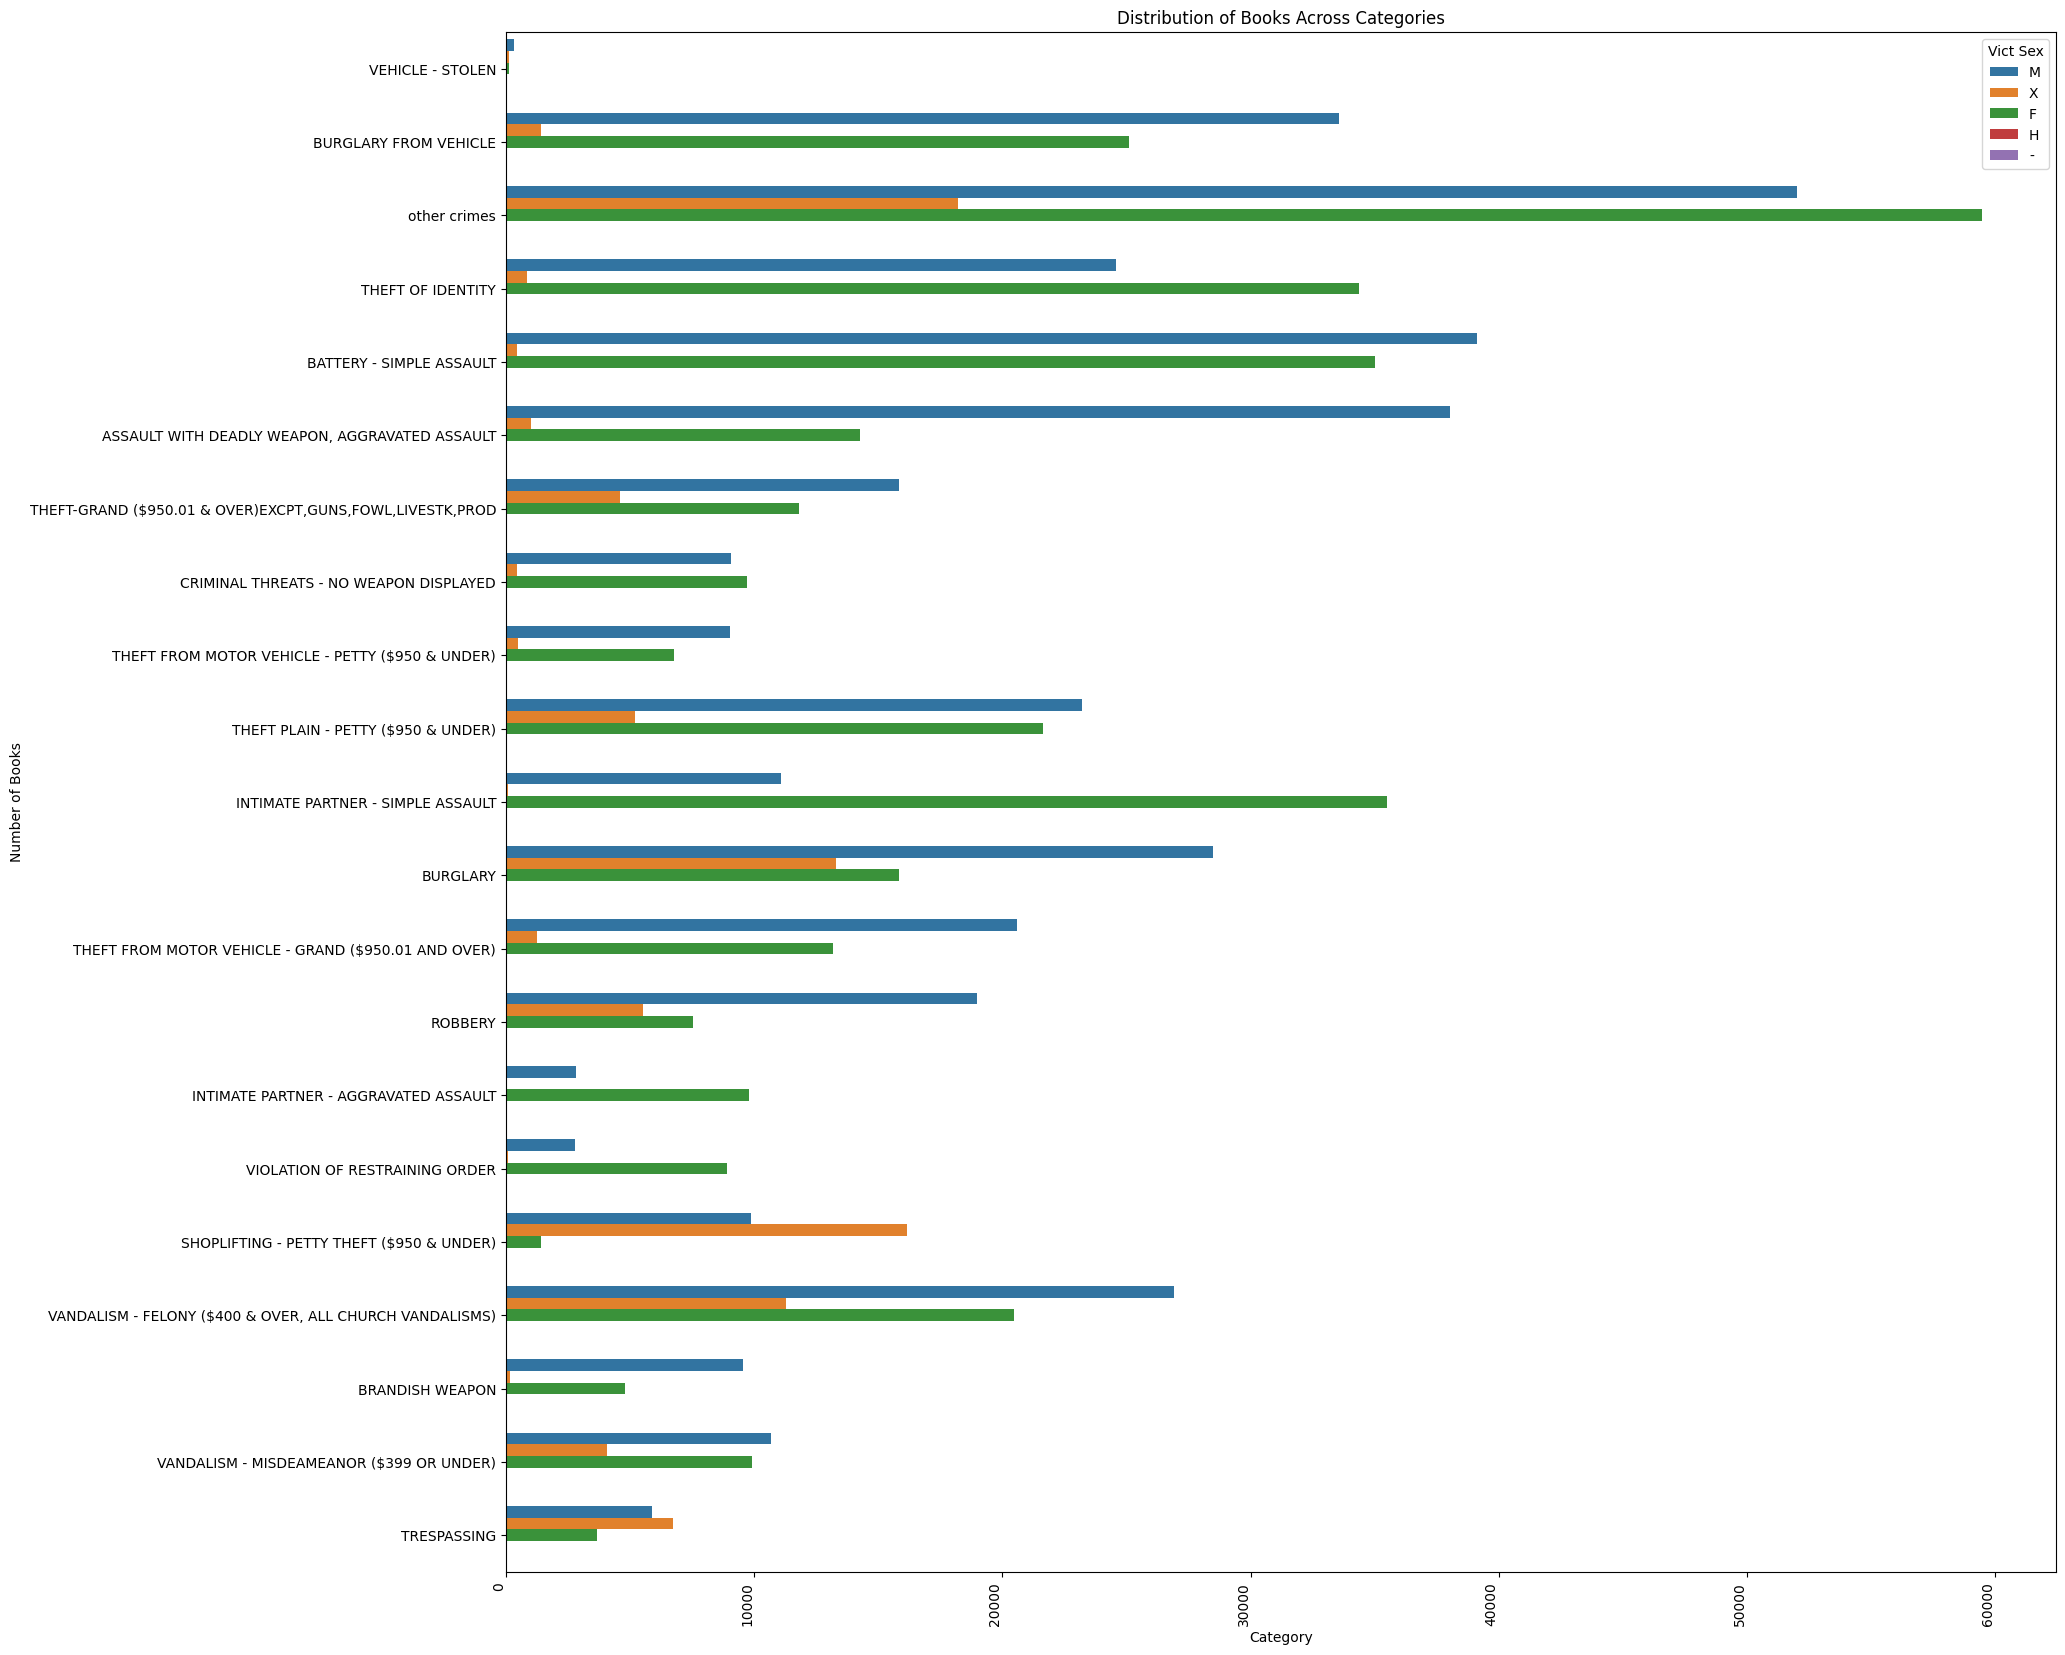

In [75]:
plt.figure(figsize=(20, 20))
ax = sns.countplot(hue="Vict Sex", y="Crime type", data=raw_crime_data_df)
plt.title('Distribution of Books Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.xticks(rotation=90, ha='right')
plt.show()

<Figure size 2000x2000 with 0 Axes>

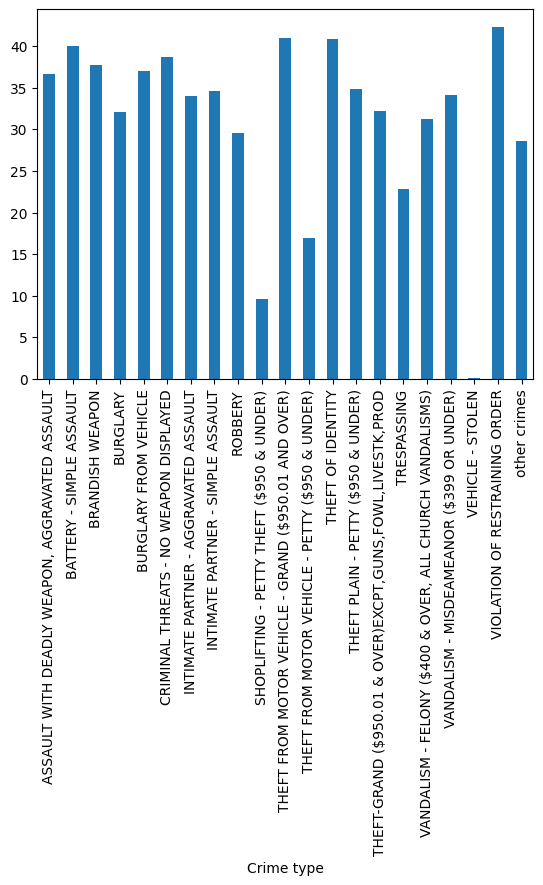

<Figure size 2000x2000 with 0 Axes>

In [78]:
raw_crime_data_df.groupby("Crime type")["Vict Age"].mean().plot(kind="bar")
plt.figure(figsize=(20, 20))